In [20]:
# Install Tika if not already installed
!pip install tika

# Import necessary libraries
from tika import parser
import os
import glob
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Ensure the inline magic is included if using Jupyter
%matplotlib inline


In [21]:
# Function to convert PDF to text using Tika
def convertPdf2TxtWithTika(input_pdf, output_txt):
    # Parse the PDF file using Tika
    parsed = parser.from_file(input_pdf)
    
    # Write the extracted content to the output text file, handling encoding errors
    with open(output_txt, 'w', encoding='utf-8', errors='ignore') as f:
        f.write(parsed['content'])


In [22]:
# Set input and output paths for the resumes
inpath = r'C:\Exercise1-Resume\Myclass_Resumes\Input\\'
outpath = r'C:\Exercise1-Resume\Myclass_Resumes\Output\\'

# Process all PDF files in the input directory
count = 0
for file in glob.glob(inpath + '*.pdf'):
    justfile = os.path.basename(file).replace(".pdf", "")
    print('INFO: processing file = ' + justfile)
    output_file = os.path.join(outpath, justfile + '.txt')
    print('INFO: - in = ' + file + ', out = ' + output_file)
    
    # Convert PDF to text
    convertPdf2TxtWithTika(file, output_file)
    count += 1

print('INFO: processed total files = ' + str(count))


INFO: processing file = Aishneet_Juneja
INFO: - in = C:\Exercise1-Resume\Myclass_Resumes\Input\Aishneet_Juneja.pdf, out = C:\Exercise1-Resume\Myclass_Resumes\Output\\Aishneet_Juneja.txt
INFO: processing file = Deja Scott_Resume
INFO: - in = C:\Exercise1-Resume\Myclass_Resumes\Input\Deja Scott_Resume.pdf, out = C:\Exercise1-Resume\Myclass_Resumes\Output\\Deja Scott_Resume.txt
INFO: processing file = Dipannoy_resume
INFO: - in = C:\Exercise1-Resume\Myclass_Resumes\Input\Dipannoy_resume.pdf, out = C:\Exercise1-Resume\Myclass_Resumes\Output\\Dipannoy_resume.txt
INFO: processing file = Gaurav_Resume
INFO: - in = C:\Exercise1-Resume\Myclass_Resumes\Input\Gaurav_Resume.pdf, out = C:\Exercise1-Resume\Myclass_Resumes\Output\\Gaurav_Resume.txt
INFO: processing file = Jinu
INFO: - in = C:\Exercise1-Resume\Myclass_Resumes\Input\Jinu.pdf, out = C:\Exercise1-Resume\Myclass_Resumes\Output\\Jinu.txt
INFO: processing file = Mahsa_Majdzadeh_Resume
INFO: - in = C:\Exercise1-Resume\Myclass_Resumes\Input\M

In [23]:
# Combine the content of all text files into one string
pathFilesToUse = outpath

all_content = ''
count = 0
for file in glob.glob(pathFilesToUse + '*.txt'):
    print("file = " + file)
    with open(file, 'r', encoding='utf-8', errors='ignore') as file_handle:
        content = str(file_handle.read()).split()
        content_as_str = " ".join(content)
        all_content += content_as_str
        count += 1

print('INFO: processed total files = ' + str(count))


file = C:\Exercise1-Resume\Myclass_Resumes\Output\Aishneet_Juneja.txt
file = C:\Exercise1-Resume\Myclass_Resumes\Output\Deja Scott_Resume.txt
file = C:\Exercise1-Resume\Myclass_Resumes\Output\Dipannoy_resume.txt
file = C:\Exercise1-Resume\Myclass_Resumes\Output\Gaurav_Resume.txt
file = C:\Exercise1-Resume\Myclass_Resumes\Output\Jinu.txt
file = C:\Exercise1-Resume\Myclass_Resumes\Output\Mahsa_Majdzadeh_Resume.txt
file = C:\Exercise1-Resume\Myclass_Resumes\Output\Rasoul_Nikmehr_Resume.txt
file = C:\Exercise1-Resume\Myclass_Resumes\Output\Ruiyang Yu_Resume.txt
file = C:\Exercise1-Resume\Myclass_Resumes\Output\Sadman_Sadeed_Omee_Resume.txt
file = C:\Exercise1-Resume\Myclass_Resumes\Output\SeyedSaeedAhmadi _Resume.txt
file = C:\Exercise1-Resume\Myclass_Resumes\Output\ZhymirThompson_Resume.txt
INFO: processed total files = 11


In [24]:
# Function to draw word cloud
def wordcloud_draw(data, color='black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                             if 'http' not in word
                             and not word.startswith('@')
                             and not word.startswith('#')
                             and word != 'RT'
                             ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color=color,
                          width=2500,
                          height=2000
                          ).generate(cleaned_word)
    plt.figure(1, figsize=(13, 13))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()


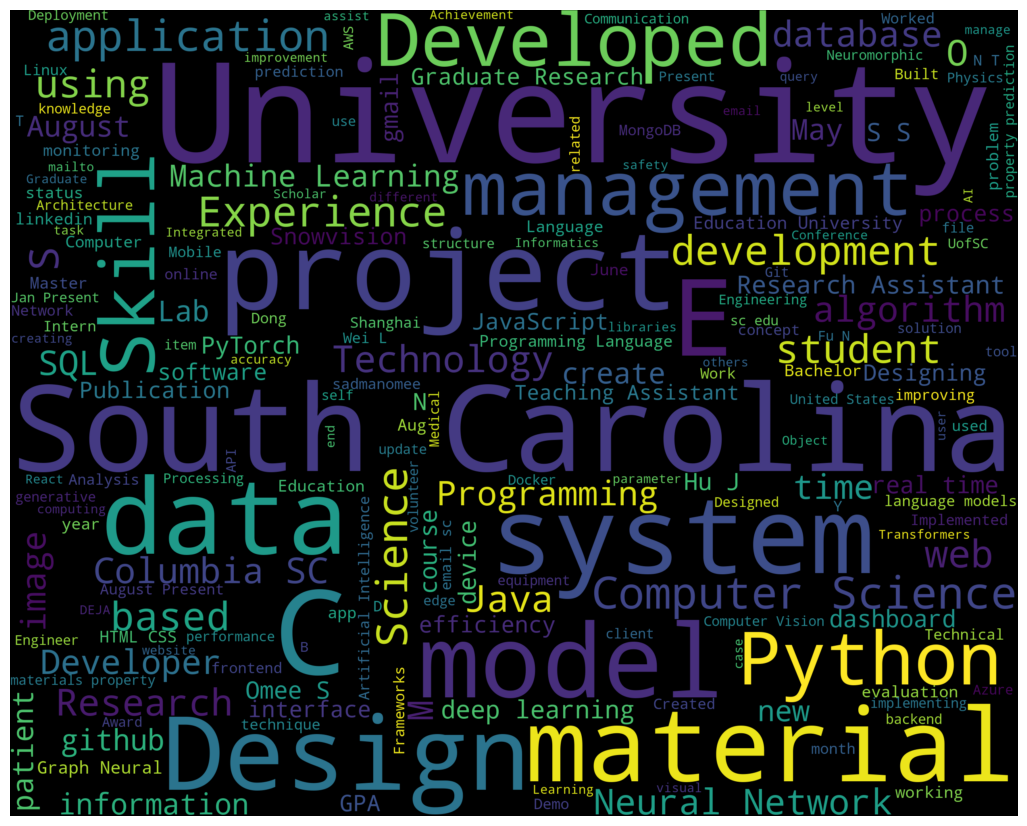

In [25]:
# Draw the word cloud from all content
wordcloud_draw(all_content.split())
